# GAN NETWORK

# Importing required libraies

In [ ]:
from numpy import zeros, ones, expand_dims, asarray
from numpy.random import randn, randint
from keras.datasets import fashion_mnist
from keras.optimizers import Adam
from keras.models import Model, load_model
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import Conv2D, Conv2DTranspose, Concatenate
from keras.layers import LeakyReLU, Dropout, Embedding
from keras.layers import BatchNormalization, Activation
from keras import initializers
from keras.initializers import RandomNormal
from keras.optimizers import Adam, RMSprop, SGD
from matplotlib import pyplot
import numpy as np
from math import sqrt

# Importing fashion MNIST data

In [ ]:
(X_train, _), (_, _) = fashion_mnist.load_data()
X_train = X_train.astype(np.float32) / 127.5 - 1
X_train = np.expand_dims(X_train, axis=3)
print(X_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


# Helper functions

In [ ]:
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)  
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

In [ ]:
def generate_real_samples(X_train, n_samples):
    ix = randint(0, X_train.shape[0], n_samples) 
    X = X_train[ix]  
    y = ones((n_samples, 1)) 
    return X, y

In [ ]:
def generate_fake_samples(generator, latent_dim, n_samples):
    z_input = generate_latent_points(latent_dim, n_samples)
    images = generator.predict(z_input)  
    y = zeros((n_samples, 1))
    return images, y

In [ ]:
def summarize_performance(step, g_model, latent_dim, n_samples=100):
    X, _ = generate_fake_samples(g_model, latent_dim, n_samples)
    X = (X + 1) / 2.0
    for i in range(100):
        pyplot.subplot(10, 10, 1 + i)
        pyplot.axis('off')
        pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
    filename2 = 'model_%04d.h5' % (step+1)
    g_model.save(filename2)
    print('>Saved: %s' % (filename2))

In [ ]:
def save_plot(examples, n_examples):
    for i in range(n_examples):
        pyplot.subplot(sqrt(n_examples), sqrt(n_examples), 1 + i)
        pyplot.axis('off')
        pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
    pyplot.show()

In [ ]:
def define_discriminator(in_shape=(28, 28, 1)):
    
    """ 
        Define discriminator here and assign it to the model variable
        the layers in the discriminator should be as follows:

            input layer with shape=in_shape
            Flatten layer
            Dense layer with 1024 neurons
            LeakyReLU layer with aplha=0.2
            Dropout layer with rate=0.3
            Dense layer with 512 neurons
            LeakyReLU layer with aplha=0.2
            Dropout layer with rate=0.3
            Dense layer with 256 neurons
            LeakyReLU layer with aplha=0.2
            Dropout layer with rate=0.3
            Dense layer with 1 neuron

        Optimizer should be adam with learning_rate=0.0002 and beta_1=0.5
        loss function should be binary_crossentropy metrics should be acuracy 
    """"

    model = None
    return model

# Creating descriminator

In [ ]:
discriminator = define_discriminator()

In [ ]:
def define_generator(latent_dim): 
    
    #define generator here and assign it to the model variable
    #the layers in the discriminator should be as follows:
    #input layer should have shape=(latent_dim,)
    #Dense layer with 256 neurons
    #LeakyReLU layer with aplha=0.2
    #Dense layer with 512 neurons
    #LeakyReLU layer with aplha=0.2
    #Dense layer with 1024 neurons
    #LeakyReLU layer with aplha=0.2
    #Dense layer with 784 neurons
    #Activation function should be tanh
    #Reshape output to shape=(28,28,1)

    model = None
    return model

# Creating Generator

In [ ]:
generator = define_generator(500)

In [ ]:
def define_gan(g_model, d_model):
    
    #define generator here and assign it to the model variable
    #set trainable attribute of discriminator as false
    #optimizer should be adam with learning_rate=0.0002 and beta_1=0.5
    #optimizer should be binary_crossentropy
    #metrics should be accuracy

    model = None
    return model

# Creating GAN Model

In [ ]:
gan_model = define_gan(generator, discriminator)

In [ ]:
def train(g_model, d_model, gan_model, X_train, latent_dim, n_epochs=100, n_batch=64):
  
  #train the model here
  #define "batches per epoch"
  #define "number of steps" based on "batches per epochs"
  #train model for "number of steps" epochs
  #call "summarize_performance" function at the end of epoch to print model accuracy and save model

# Training GAN with tuned hyperparameters

In [ ]:
latent_dim = 100
train(generator, discriminator, gan_model, X_train, latent_dim, n_epochs=2, n_batch=32)

# Predicting 4 random images

1/1 [==============================] - 0s 57ms/step


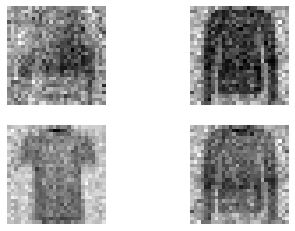

In [ ]:
model = load_model('model_3750.h5')
latent_dim = 100
n_examples = 4
latent_points = generate_latent_points(latent_dim, n_examples)
X  = model.predict(latent_points)
X = (X + 1) / 2.0
save_plot(X, n_examples)

# Comparing with original dataset

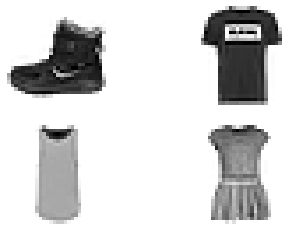

In [ ]:
save_plot(X_train, 4)